### Hotel demand analysis

##### About 
This dataset describes hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. it contains 31 variables describing the of 119390 observations. Each observation represents a hotel booking. the bookings arrival is between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

##### Variables
hotel : city or resort

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : month of arrival date

arrival_date_week : Week number of year for arrival date

arrival_date_day_month : day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal:Type of meal booked. Categories are presented in standard hospitality meal packages:
    Undefined/SC – no meal package;
    BB – Bed & Breakfast;
    HB – Half board (breakfast and one other meal – usually dinner);
    FB – Full board (breakfast, lunch and dinner)

country:Country of origin

market_segment:Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel:Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest:Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations:Number of previous bookings that were cancelled by the customer prior to the current booking

reserved_room_type:Code of room type reserved. Code is presented instead of designation for anonymity reasons

assigned_room_type:code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. 

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type:Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    No Deposit – no deposit was made.
    Non Refund – a deposit was made in the value of the total stay cost.
    Refundable – a deposit was made with a value under the total cost of stay.

agent: ID of the travel agency that made the booking

company:ID of the company/entity that made the booking or responsible for paying the booking. 

days_in_waiting_list:Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type:Type of booking, assuming one of four categories:
    Contract - when the booking has an allotment or other type of contract associated to it;
    Group – when the booking is associated to a group;
    Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    Transient-party – when the booking is transient, but is associated to at least other transient booking

adr:Average Daily Rate Calculated by dividing the sum of all lodging transactions by the total number of staying nights

total_of_special_requests:Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status:	Reservation last status, assuming one of three categories:	
    Canceled – booking was canceled by the customer;
    Check-Out – customer has checked in but already departed;
    No-Show – customer did not check-in and did inform the hotel of the reason why
    
reservation_status_date:Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


Step 1 : importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
from dash import Dash, html, dcc
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.groupby(by=['deposit_type','is_canceled']).size()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Data Pre-processing

Step A : dropping unwanted columns and null rows

In [8]:
print("Number of null values in each columns:", df.isnull().sum(), sep='\n')

Number of null values in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent             

some columns are extra or has too many null values
so they are going to be dropped

In [9]:
df.drop(['company','agent','required_car_parking_spaces'], axis=1, inplace=True)

some columns have null values in few rows so the rows are going to be dropped

In [10]:
df.dropna(subset=['country', 'children'], axis=0, inplace=True)

after the updates:

In [11]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status          

In [12]:
df.drop_duplicates(inplace = True)

Step B : creating new variables by combining existing variables

A new feature to calculate the total number of days that the guests stayed 

In [13]:
# Total Number of Days Stayed
df['Total_Stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [14]:
df.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1, inplace=True)

In [15]:
df.reset_index(inplace = True)

A new feature to combine the full date in one column

In [16]:
# Converting string month to numerical one (Dec = 12, Jan = 1, etc.)
datetime_object = df['arrival_date_month'].str[0:3]
month_number = np.zeros(len(datetime_object))

# Creating a new column based on numerical representation of the months
for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.datetime.strptime(datetime_object[i], "%b")
    month_number[i] = datetime_object[i].month

# Float to integer conversion
month_number = pd.DataFrame(month_number).astype(int)

In [17]:
df['arrival_date'] = df['arrival_date_year'].map(str) + '-' + month_number[0].map(str) + '-' + df['arrival_date_day_of_month'].map(str)

only month and year combined

In [18]:
df['arrival_month_year'] = df['arrival_date_year'].map(str) + '-' + month_number[0].map(str) 

A new feature to calculate the total number of guests

In [19]:
df['Total_Guests'] = df['adults']+df['children']+df['babies']

some rows have a total of 0 guests which is can't be correct so these rows will be dropped

In [20]:
df[df['Total_Guests']==0]

index         hotel  is_canceled  lead_time  arrival_date_year  \
2080     2224  Resort Hotel            0          1               2015   
2216     2409  Resort Hotel            0          0               2015   
2790     3181  Resort Hotel            0         36               2015   
3075     3684  Resort Hotel            0        165               2015   
3083     3708  Resort Hotel            0        165               2015   
...       ...           ...          ...        ...                ...   
83090  115029    City Hotel            0        107               2017   
83142  115091    City Hotel            0          1               2017   
84075  116251    City Hotel            0         44               2017   
84330  116534    City Hotel            0          2               2017   
84792  117087    City Hotel            0        170               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2080             October                        41                          6   
2216             October                        42                         12   
2790            November                        47                         20   
3075            December                        53                         30   
3083            December                        53                         30   
...                  ...                       ...                        ...   
83090               June                        26                         27   
83142               June                        26                         30   
84075               July                        28                         15   
84330               July                        28                         15   
84792               July                        30                         27   

       adults  children  ...  days_in_waiting_list    customer_type     adr  \
2080        0       0.0  ...                     0  Transient-Party    0.00   
2216        0       0.0  ...                     0        Transient    0.00   
2790        0       0.0  ...                     0  Transient-Party    0.00   
3075        0       0.0  ...                   122  Transient-Party    0.00   
3083        0       0.0  ...                   122  Transient-Party    0.00   
...       ...       ...  ...                   ...              ...     ...   
83090       0       0.0  ...                     0        Transient  100.80   
83142       0       0.0  ...                     0        Transient    0.00   
84075       0       0.0  ...                     0        Transient   73.80   
84330       0       0.0  ...                     0  Transient-Party   22.86   
84792       0       0.0  ...                     0        Transient    0.00   

      total_of_special_requests reservation_status  reservation_status_date  \
2080                          0          Check-Out               2015-10-06   
2216                          0          Check-Out               2015-10-12   
2790                          0          Check-Out               2015-11-23   
3075                          0          Check-Out               2016-01-04   
3083                          0          Check-Out               2016-01-05   
...                         ...                ...                      ...   
83090                         0          Check-Out               2017-06-30   
83142                         1          Check-Out               2017-07-01   
84075                         0          Check-Out               2017-07-17   
84330                         1          Check-Out               2017-07-22   
84792                         0          Check-Out               2017-07-29   

       Total_Stays  arrival_date arrival_month_year Total_Guests  
2080             3     2015-10-6            2015-10          0.0  
2216             0    2015-10-12            2015-10          0.0  
2790             3    2015-11-20            201

In [21]:
df.drop(df[df['Total_Guests']==0].index, axis=0, inplace=True)

reset dataframe after all the updates

In [22]:
df.reset_index(inplace = True)

In [23]:
df.drop(['level_0','index'], axis=1, inplace=True)

#### EDA : exploratory data analysis

the figure below demonstrate each variables and their values

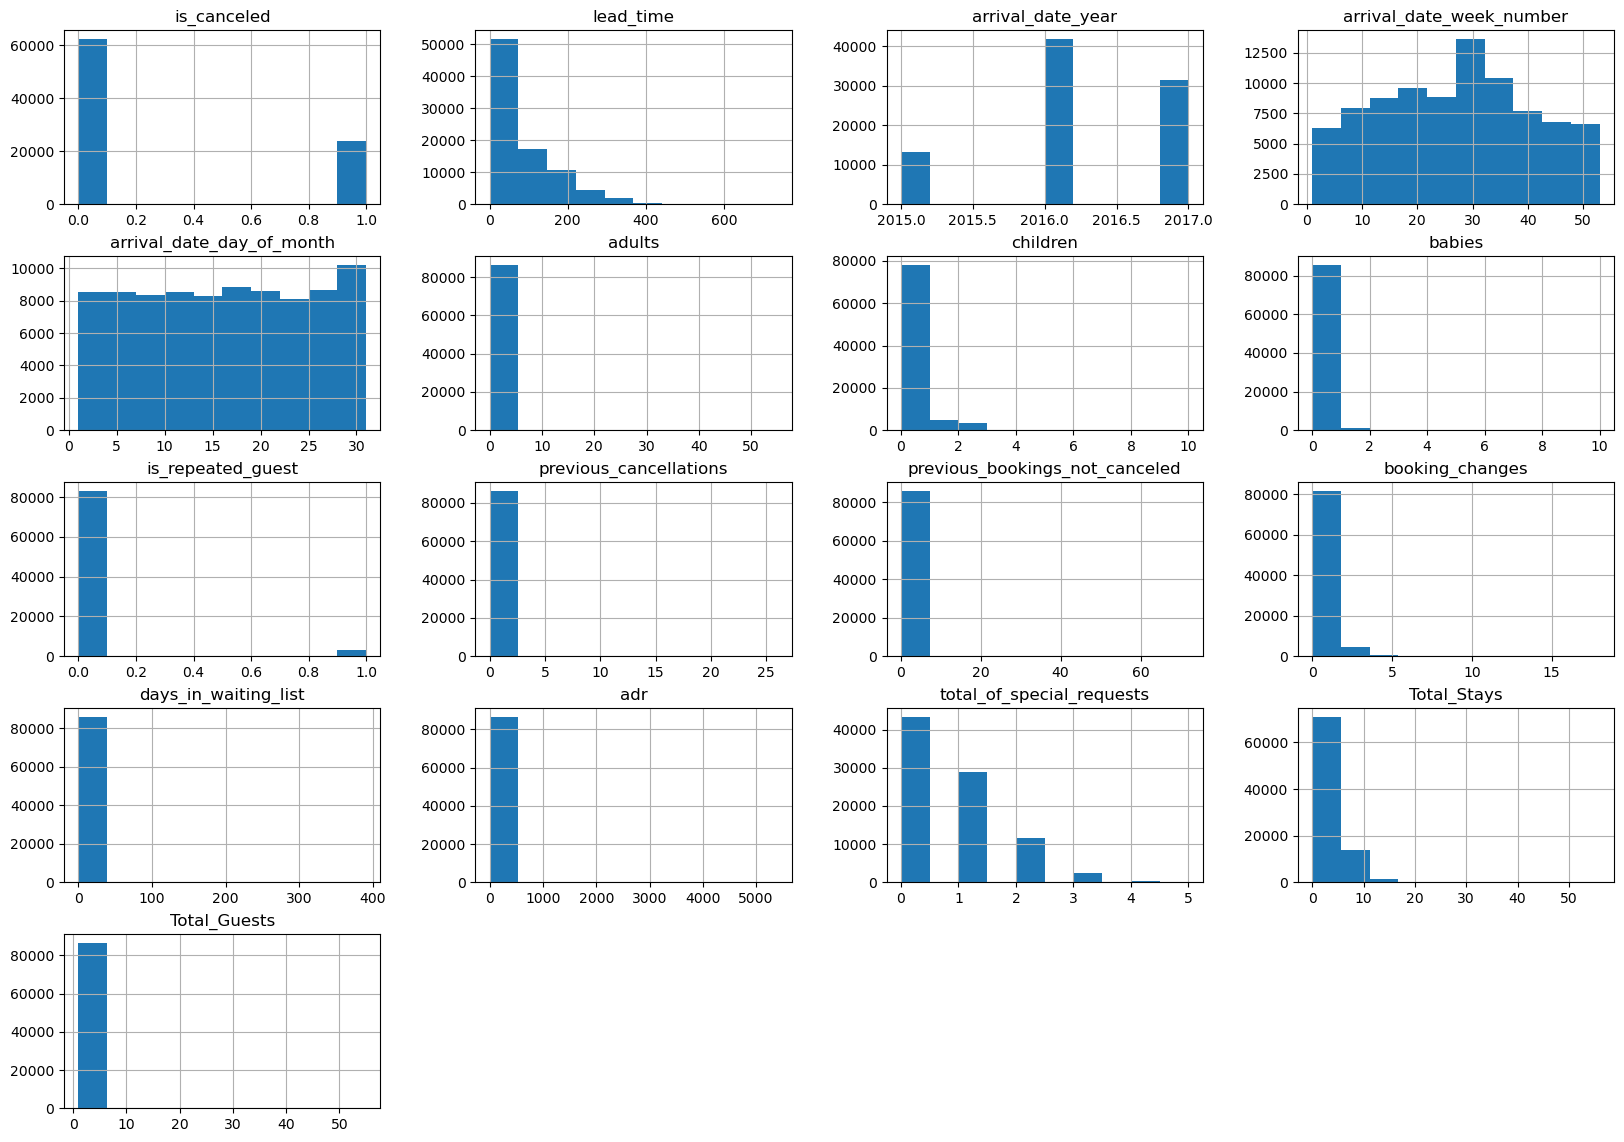

In [24]:
df.hist(figsize=(20,14))
plt.show()

cancellation rate where there are more than 60k uncanceled bookings vs almost 25k canceled bookings

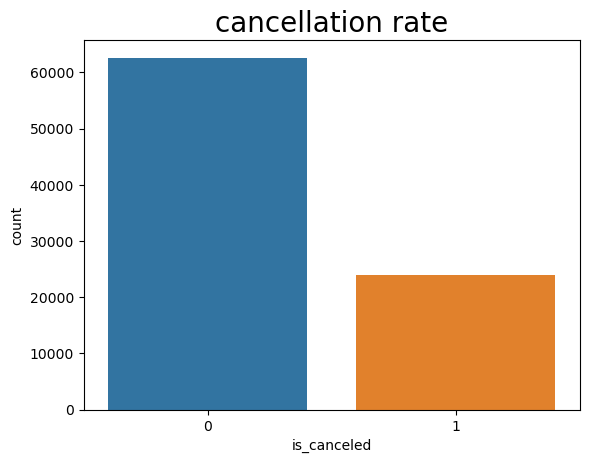

In [25]:
plt.title("cancellation rate", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data = df)

plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', data = df)

every year people go to diferent countries, the bookings can be tracked through the years and there is a heavy-density area in euroupe 

In [26]:
fig = px.scatter_geo(df, locations="country", color="country", hover_name="country", 
               animation_frame="arrival_date_year", projection="winkel3")
fig.show()

As we can see in the graph below, there is less booking activity in the colder months (November, December, January, Februray)
this can be a result of low tempreture degree and also because usually they are considered as school months so there are no international vacations that allows people to travel

In [27]:
df_grouped = df.groupby(by=['arrival_month_year','hotel']).size().reset_index(name="counts")

In [28]:
px.bar(data_frame=df_grouped, x="arrival_month_year", y="counts", color="hotel", barmode="group",title= 'bookings count over the months')


### correlation graph 

some features have a relationship between them which can be discovred using correlation graph 

In [29]:
dfEncode = df.copy(deep=True)

In [30]:
dfEncode["deposit_type"] = dfEncode["deposit_type"].replace({"Refundable": 0, "Non Refund": 1,"No Deposit":2})

In [31]:
checkCorrDF = dfEncode.drop(['hotel','adults','arrival_date_day_of_month','meal','market_segment',
 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date','children','babies'], axis=1)

Text(0.5, 1.0, 'Correlation Graph')

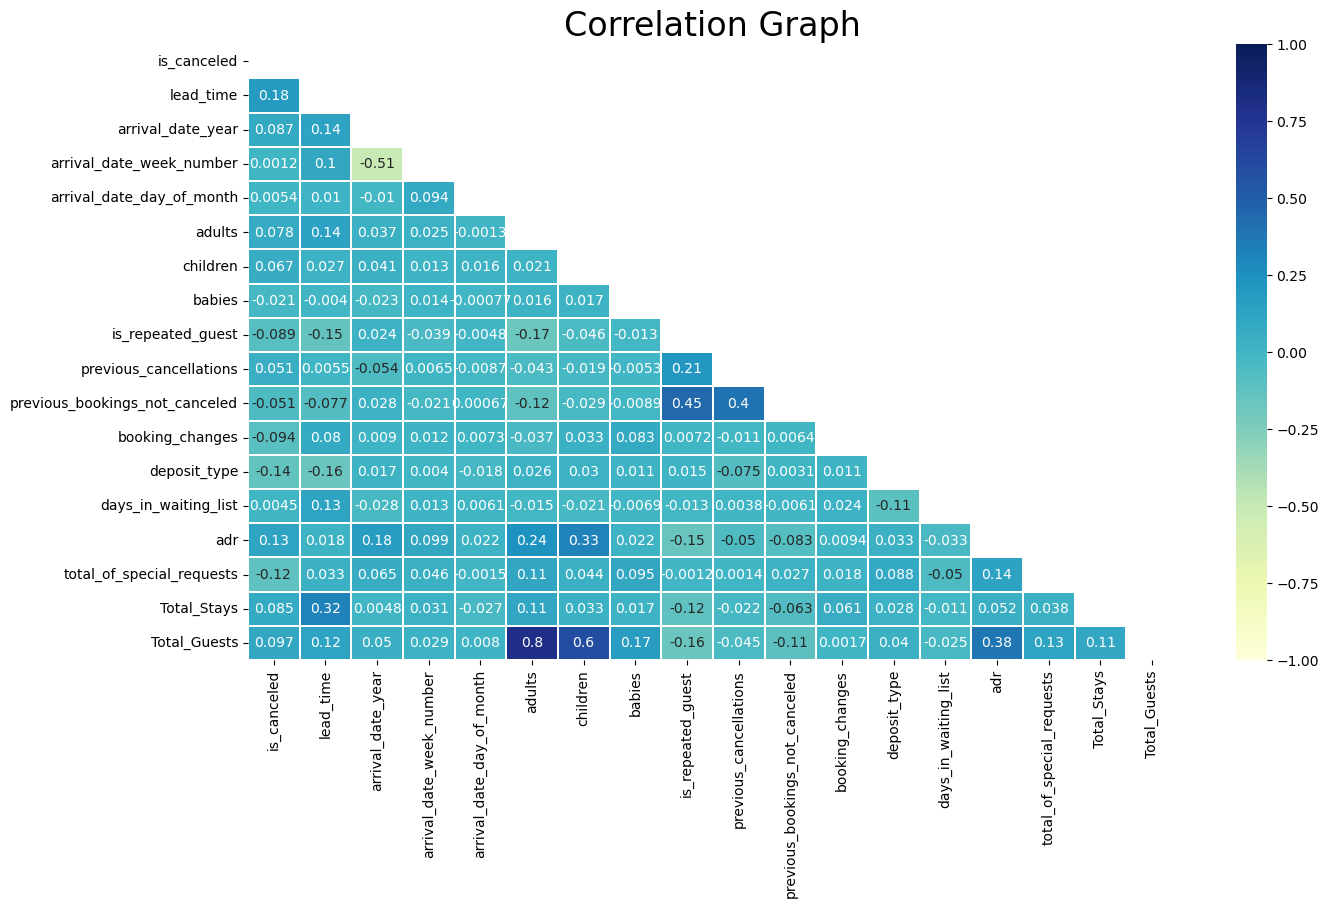

In [32]:
plt.figure(figsize=(15, 8))
mask =np.triu(np.ones_like(dfEncode.corr()))
correlation = sns.heatmap(dfEncode.corr(), mask=mask,cmap="YlGnBu", vmin=-1, vmax=1, annot=True,linewidths = 0.1)

correlation.set_title('Correlation Graph', fontdict={'fontsize': 24})

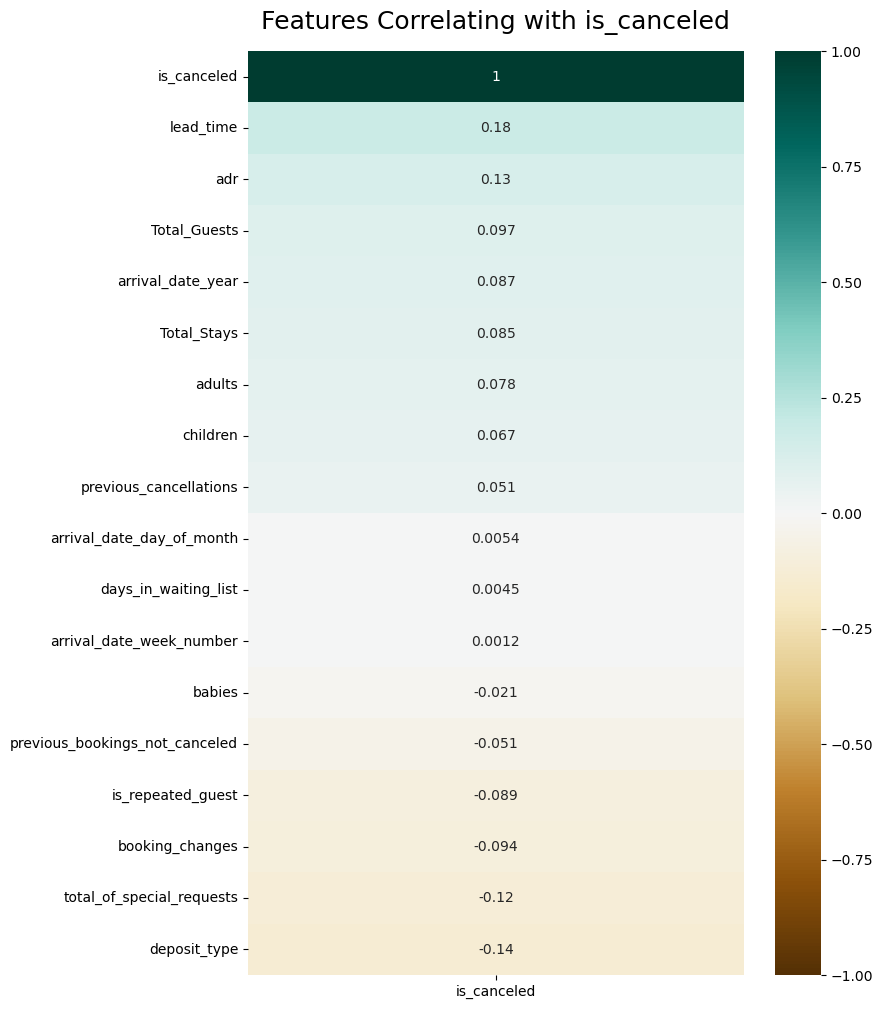

In [33]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfEncode.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with is_canceled', fontdict={'fontsize':18}, pad=16);

the top 5 features that have correlation with is_canceled are :
- lead_time : 0.18
- deposit_type : -0.14
- adr : 0.13
- total_of_special_requests : -0.12

let's explore the deposit type correlation :

deposit Type:

there are 3 types of deposit :
- no deposit
- non-refund
- refundable 
and they can affect the cancellation rate 

In [34]:
deposit_cancel = df.groupby(by=["deposit_type","is_canceled"]).size().to_frame(name = 'count')

In [35]:
deposit_cancel

count
deposit_type is_canceled       
No Deposit   0            62486
             1            22964
Non Refund   0               55
             1              982
Refundable   0               78
             1               26

In [36]:
dfEncodecancel = df.copy(deep=True)

In [37]:
dfEncodecancel["is canceled?"] = df["is_canceled"].replace({0: 'No', 1: 'Yes'})

In [38]:
fig = px.histogram(dfEncodecancel, x='deposit_type', color="is canceled?", barmode='stack',title="deposit type and cancellation rate")
fig.show()

mostly, guests reserve in places that does not require deposit and they represent 98.7% of all guests, 73% out of them show up for their bookings

but surprisingly, 94.7% of the bookings that are non refundable (fully paid before the arrival) end up being canceled 


__what countries have more reservations?__

In [39]:
topCountries = df.groupby(by=['country']).size().reset_index(name="counts")


In [40]:
topCountries = topCountries.sort_values(by=['counts'], ascending=False).head(10)
topCountries

country  counts
135     PRT   27264
59      GBR   10401
56      FRA    8813
51      ESP    7216
43      DEU    5381
81      ITA    3059
76      IRL    3014
15      BEL    2076
25      BRA    1989
123     NLD    1906

In [41]:
fig1 =px.bar(data_frame=topCountries, x="country", y="counts",text_auto=True,title="Top 10 countries that have the most number of reservations ")
fig1.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig1.show()

Portugal is the top in the list with almost 27.3k bookings followed by :
- United kingdom with 10.4k bookings
- France with 8.8k bookings
- Spain with 7.2k bookings
- Germany with 5.4k bookings

__in which country customers stay the most?__

On average,The total stays is 4 days

In [42]:
topCountriesStays = df.groupby(by=['country']).mean()

In [43]:
"longest stay in days : "+str(df['Total_Stays'].max())

'longest stay in days : 56'

In [44]:
"average stay in days : "+str(df['Total_Stays'].mean())

'average stay in days : 3.6364980194246517'

In [45]:
"shortest stay in days : "+str(df['Total_Stays'].min())

'shortest stay in days : 0'

In [46]:
topCountriesStays.sort_values(by=['Total_Stays'], ascending=False).head(10)['Total_Stays']

country
FRO    10.666667
SEN     8.818182
AGO     8.263158
TGO     8.000000
GNB     7.111111
SLE     7.000000
BHS     7.000000
PLW     7.000000
RWA     6.500000
CPV     6.304348
Name: Total_Stays, dtype: float64

Faroe Islands is the country that guests stay in for the longest time with average of 11 days

__what is the average time intrval between the reservation and the arrival day?__

on average, guests reserve 80 days before their arrival day 

In [47]:
df['lead_time'].mean()

80.30953563303346

but in this case, mean can be a bit misleading!
As you can see in the boxplote below, the data has outliers, there are some people who likes to plan time ahead (one year and more) and they don't necessarily represent everyone else but they can affect the mean
In such cases, it's best to go with the median which can say that in regular situations, the lead time is 50 days before arriving

In [48]:
# Creating plot
fig = px.box(df, y="lead_time")
fig.show()

__do guests usually get the room that they reserved?__

In [49]:
NoCancel = df[df['is_canceled']==0]

In [50]:
NoCancel['Same_Room']= NoCancel['reserved_room_type']== NoCancel['assigned_room_type']

C:\Users\naalmutairi\AppData\Local\Temp\ipykernel_25960\3019705208.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
NoCancel=NoCancel.groupby('Same_Room').size()
NoCancel

Same_Room
False    12119
True     50500
dtype: int64

In [52]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['different room','same room'],
                             values=[NoCancel[0],NoCancel[1]])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title=go.layout.Title(
        text="Do guests get the reserved room or not? <br>",
        xref="paper",
        x=0
    ))
fig.show()

80% of guests get the room they reserved which can help reduce cancellation rates

### conclusion:
In this notebook, we explored the pattrens and trends in guests' behaviors 
